# Previsão de acesso ao link publicitário através dos perfis dos usuários utilizando regressão logística

Conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda.<br /> 

Este conjunto de dados contém os seguintes recursos:<br />

'Daily Time Spent on Site': tempo no site em minutos.<br />
'Age': idade do consumidor.<br />
'Area Income': Média da renda do consumidor na região.<br />
'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.<br />
'Linha do tópico do anúncio': Título do anúncio.<br />
'City': Cidade do consumidor.<br />
'Male': Se o consumidor era ou não masculino.<br />
'Country': País do consumidor.<br />
'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.<br />
'Clicked on Ad': 0 ou 1 indicam se clicou ou não no anúncio.<br />

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [131]:
df = pd.read_csv('datasets/advertising.csv')

In [132]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [133]:
# O dataset está completo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [134]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

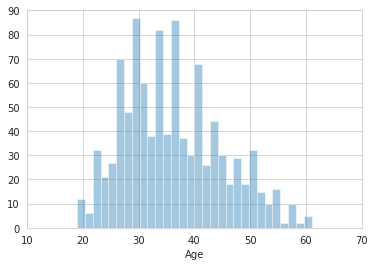

In [135]:
# Distribuição de usuários por idade

sns.set_style('whitegrid')
plt.xlim(10, 70)
plt.ylim(0, 90)
sns.distplot(df['Age'], kde=False, bins=30)

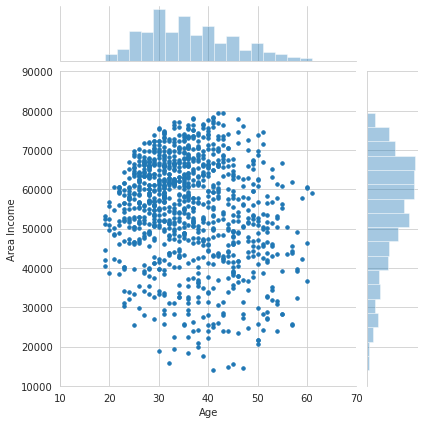

In [136]:
# Dispersão Idade x Média de renda
# Temos uma grande concentração de usuários de 20 a 42 anos
# com média de renda entre 48.000 a 80.000

sns.jointplot(x="Age", y="Area Income", xlim=(10,70), ylim=(10000,90000), s=12, data=df)

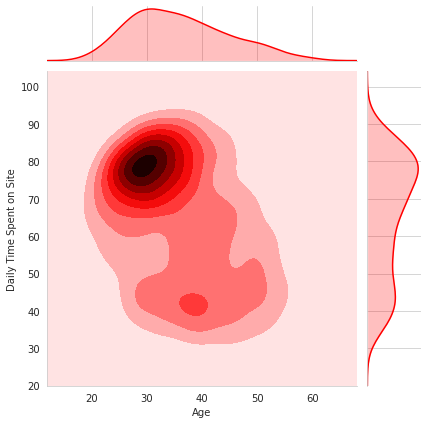

In [137]:
# Visualizando a densidade Idade x Média de minutos no site
# Há maior concentração entre 70 a 90 minutos para a idade entre 20 a 42 anos.

sns.jointplot("Age", "Daily Time Spent on Site", data=df,
                  kind="kde", space=0.2, color="r")

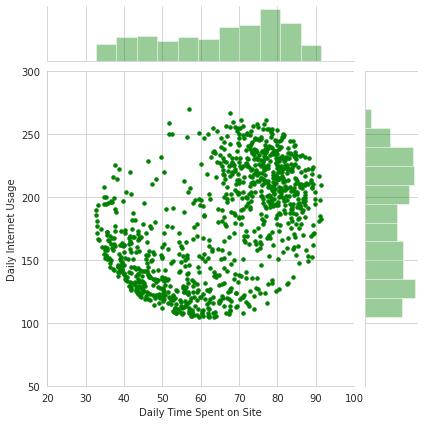

In [138]:
# visualizando a relação do tempo que o usuário está na internet
# com o tempo de permanência no site
# Há uma forte tendência de aumento de tempo no site em relação ao tempo de internet.

sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", xlim=(20,100), ylim=(50,300), s=12, color="g", data=df)

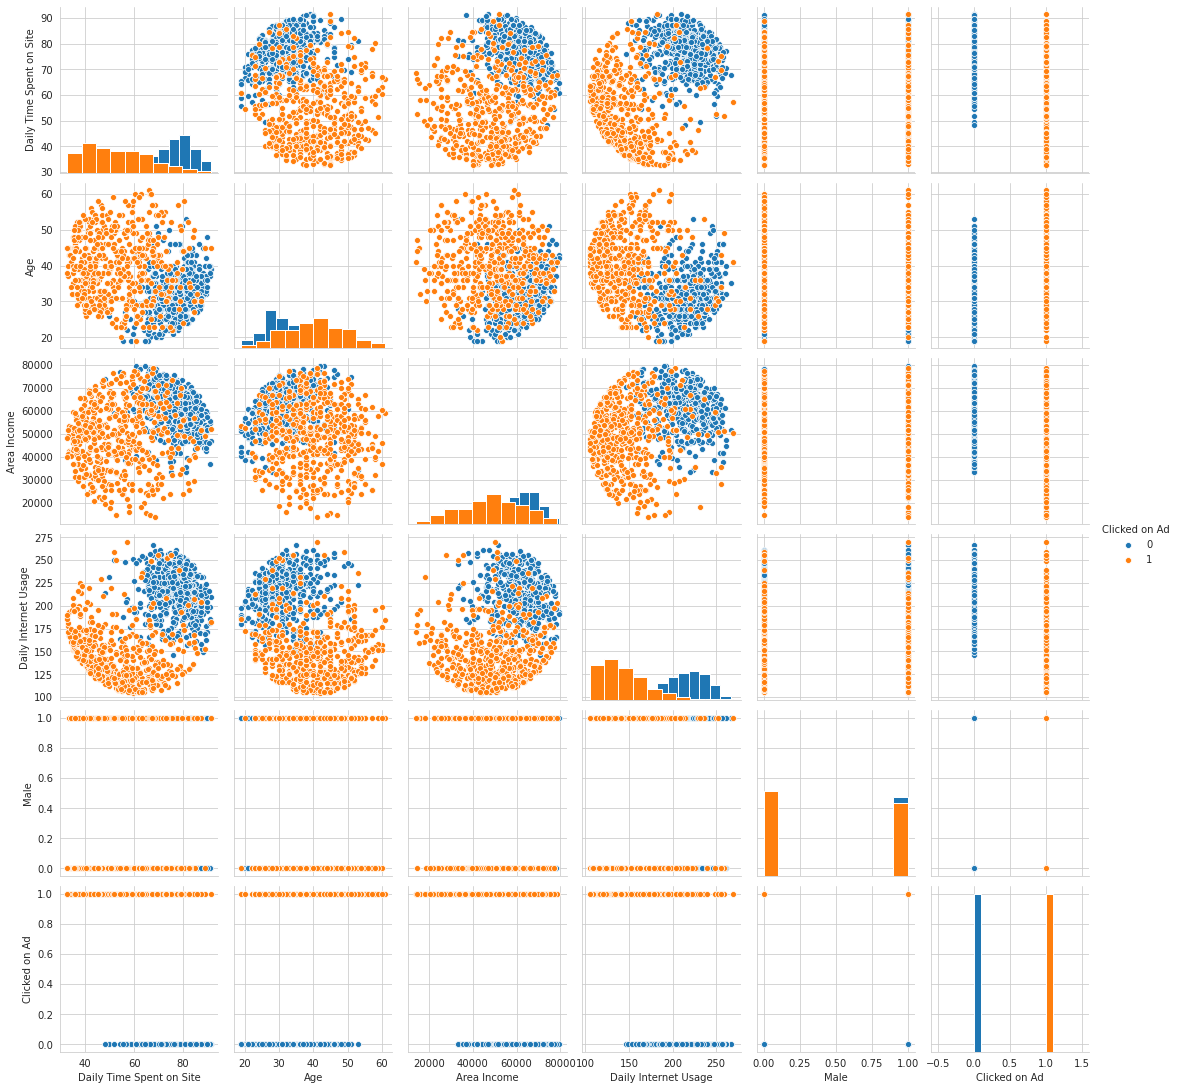

In [139]:
sns.pairplot(df, hue="Clicked on Ad", diag_kind="hist", 
             vars=["Daily Time Spent on Site", "Age", "Area Income", 
                   "Daily Internet Usage", "Male", "Clicked on Ad"])

In [140]:
# Removendo atributos
df_report = df.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)

In [141]:
# Treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(df_report.drop('Clicked on Ad',axis=1), 
                                                    df_report['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

lr = LogisticRegression()


In [142]:
from sklearn.model_selection import GridSearchCV

iter_list = list(range(40,100))

parametros = dict(max_iter=iter_list)

grid = GridSearchCV(lr, parametros, cv=5, scoring='accuracy')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                                      50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
                                      60, 61, 62, 63, 64, 65, 66, 67, 68, 69, ...]},
             scoring='accuracy')

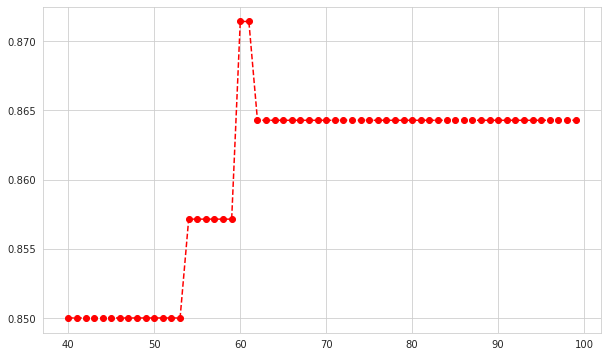

In [143]:
plt.figure(figsize=(10,6))
plt.plot(iter_list,grid.cv_results_['split0_test_score'], color='red', linestyle='dashed', marker='o')


In [144]:

print("Melhor parâmetro {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))
print("")

best_iter = grid.best_params_['max_iter']

lr = LogisticRegression(max_iter=best_iter)
lr.fit(X_train,y_train)

Melhor parâmetro {'max_iter': 61} com o valor de acurácia 0.8885714285714286 



LogisticRegression(max_iter=61)

In [145]:
# Resultados do melhor parâmetro

predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       157
           1       0.93      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[148   9]
 [ 16 127]]
